# Background of Data

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision.
Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.
As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

## Project Objective

- To develop a robust machine learning model to accurately classify handwritten digits from the MNIST dataset
- To correctly identify digits from a dataset of tens of thousands of handwritten images in the test dataset, thereby enhancing digit recognition systems.

## Project Scope

- The project involves data preprocessing, exploratory data analysis, feature engineering, model training, evaluation, and deployment. The focus will be on improving model accuracy and efficiency using various machine learning algorithms.

In [40]:
# import numpy
import numpy as np

np.random.seed(10)  # for reproducibility

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.random.seed(0)

# image processing
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# utility functions
import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

## Exploring the Data

### Load image data from MNIST.

In [41]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# The number of training and testing images present in the dataset
print('There are %d training images.' % len(X_train))
print('There are %d testing images.' % len(X_test))

There are 60000 training images.
There are 10000 testing images.


Let's look at some samples from the dataset:

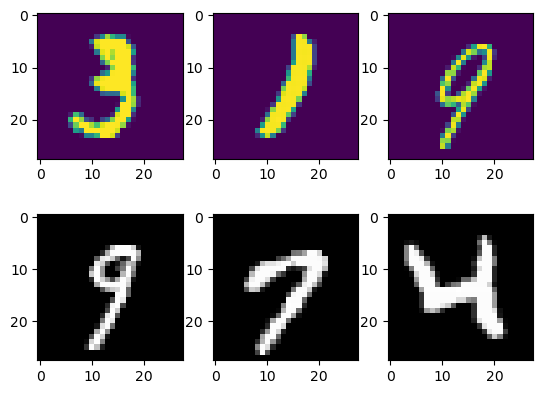

In [42]:
import matplotlib.pyplot as plt

# plot some random images in default as well as gray scale format
plt.subplot(231)
plt.imshow(X_train[10])
plt.subplot(232)
plt.imshow(X_train[78])
plt.subplot(233)
plt.imshow(X_train[22])
plt.subplot(234)
plt.imshow(X_train[43], cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(X_train[15], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.imshow(X_train[20], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

We also need to take a look at dimensions of the input images from the dataset so that we can decide whether it needs preprocessing or not before getting it as input to the neural networks.

In [43]:
# printing shape of training dataset
print ('Shape of training dataset:') 
print (X_train.shape)

# printing shape of testing dataset
print ('Shape of testing dataset:')
print (X_test.shape)

Shape of training dataset:
(60000, 28, 28)
Shape of testing dataset:
(10000, 28, 28)


## EDA

### Label count

In [44]:
yy = pd.DataFrame(y_train)
yy.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [45]:
pd.DataFrame(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

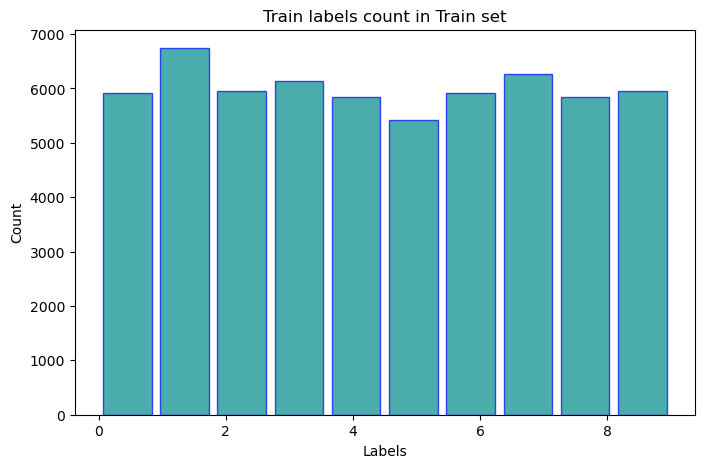

In [46]:
plt.figure(figsize=(8, 5))
plt.hist(yy, bins=10, color='DarkCyan', alpha=0.7, rwidth=0.85, edgecolor='blue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Train labels count in Train set')
plt.show()

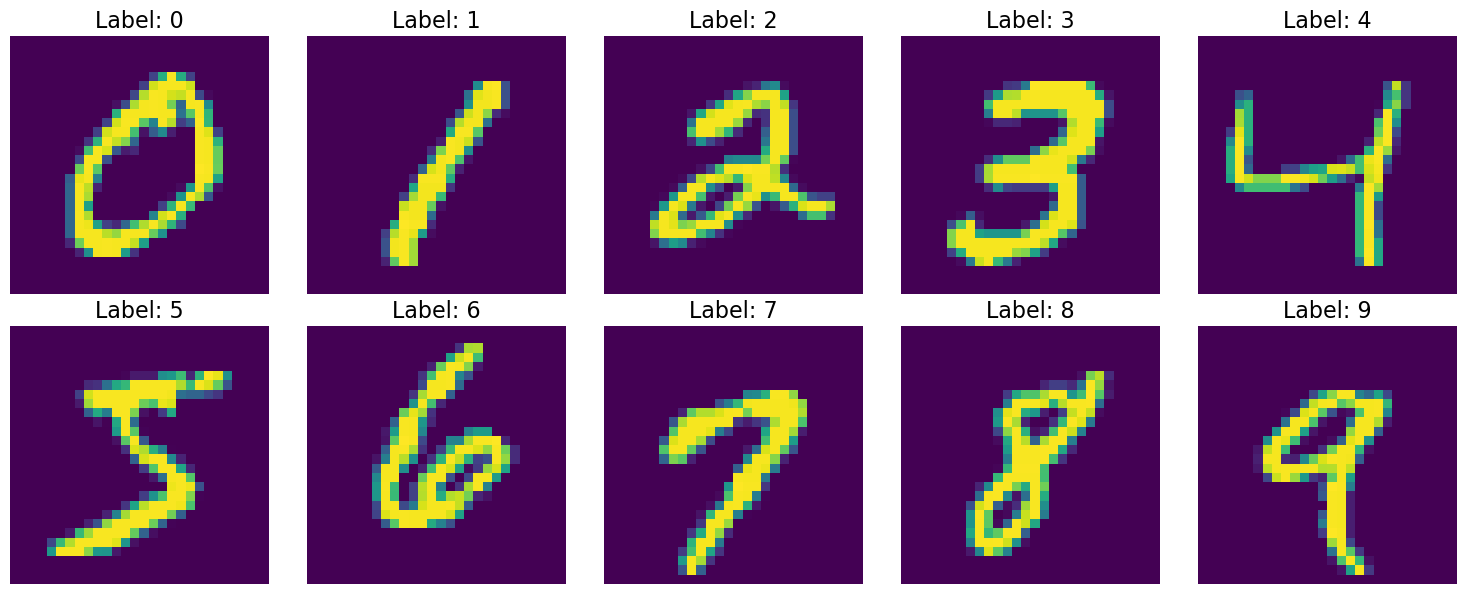

In [47]:
num_classes = 10
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(num_classes):
    ax = axs[i // 5, i % 5] 
    ax.imshow(X_train[y_train == i][0])  
    ax.set_title("Label: {}".format(i), fontsize=16) 
    ax.axis('off') 
plt.tight_layout()
plt.show()


Initial Observations

- Images are uniformly sized (28x28 pixels).
- Labels are evenly distributed across all digit classes.
- Potential noise in handwritten digit images.

## **Preprocessing Data**

### Normalize the Pixel values
Each of the pixels that represents an image stored inside a computer has a pixel value which describes how bright that pixel is, and/or what color it should be. In the simplest case of binary images, the pixel value is a 1-bit number indicating either foreground or background. For a grayscale images, the pixel value is a single number that represents the brightness of the pixel. The most common  pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white. Values in between make up the different shades of gray. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255 and this will normalize our data values to the range [0, 1].

In [48]:
# convert data type to float32 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing pixel values
X_train = X_train/255
X_test = X_test/255

In [49]:
x_train = X_train.reshape(X_train.shape[0], 784)
x_test = X_test.reshape(X_test.shape[0], 784)
print(x_train.shape)

(60000, 784)


In [50]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model building

In [51]:
model_metrics = {
    'model': [],
    'f1_score': [],
    'accuracy': [],    
    'precision': [],
    'recall': [],
    'confusion matrix':[]
   
}


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,roc_auc_score,roc_curve

pipelines = {
    'Random Forest': Pipeline([('rf', RandomForestClassifier(random_state=42))]),
    'KNeighbors': Pipeline([('knn', KNeighborsClassifier())]),
    'Decision Tree': Pipeline([('dt', DecisionTreeClassifier(random_state=42))]),
    'Bagging Classifier': Pipeline([('bag', BaggingClassifier(base_estimator=SGDClassifier(random_state=42, n_jobs=-1, max_iter=1500),
                                               random_state=42, n_jobs=-1))]),
    'SGD Classifier': Pipeline([('sgd', SGDClassifier(random_state=42))])
}

for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
        
    print(f"The model: {name}")
    print('Accuracy Score  ', accuracy_score(y_test, y_pred))
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    model_metrics['model'].append(f'{name} ')
    model_metrics['accuracy'].append( accuracy_score(y_test, y_pred).round(2)*100)
    model_metrics['f1_score'].append(f1_score(y_test, y_pred, average='weighted').round(2)*100)
    model_metrics['precision'].append(precision_score(y_test, y_pred, average='weighted').round(2)*100)
    model_metrics['recall'].append(recall_score(y_test, y_pred, average='weighted').round(2)*100)
    model_metrics['confusion matrix'].append(confusion_matrix(y_test, y_pred).tolist())

The model: Random Forest
Accuracy Score   0.9704
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5 

## CNN

## **Define model architecture**

The Keras layers module provides a high-level API that makes it easy to construct a neural network. It provides methods that facilitate the creation of dense (fully connected) layers and convolutional layers, adding activation functions, and applying dropout regularization. Here, we will learn how to use layers to build a convolutional neural network model to recognize the handwritten digits in the MNIST data set.
### **About CNN**
Convolutional neural networks (CNNs) are the current state-of-the-art model architecture for image classification tasks. CNNs apply a series of filters to the raw pixel data of an image to extract and learn higher-level features, which the model can then use for classification. Our aim of introducing more and more layers is increasing the depth of image and decreasing the height and depth of the image. More the depth, more patterns the model will learn within the image. 

## Compile and Fit the Model

In [53]:

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
epochs=13
model.fit(x=x_train, y=y_train,  epochs=epochs)

Epoch 1/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8527 - loss: 0.4841
Epoch 2/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9632 - loss: 0.1180
Epoch 3/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9734 - loss: 0.0852
Epoch 4/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9790 - loss: 0.0629
Epoch 5/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0500
Epoch 6/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9870 - loss: 0.0416
Epoch 7/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9897 - loss: 0.0330
Epoch 8/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9903 - loss: 0.0295
Epoch 9/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9914 - loss: 0.0266
Epoch 10/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9914 - loss: 0.0248
Epoch 11/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9927 - loss: 0.0215
Epoch 12/13
1875/1875 ━━━━━━

## Evaluate model on test data

In [55]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [56]:
print('Accuracy Score  ', accuracy_score(y_test, y_pred_classes))
print('Classification Report')
print(classification_report(y_test, y_pred_classes))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_classes))
print("\n")

model_metrics['model'].append('CNN')
model_metrics['accuracy'].append(accuracy_score(y_test, y_pred_classes).round(2)*100)
model_metrics['f1_score'].append(f1_score(y_test, y_pred_classes, average='weighted').round(2)*100)
model_metrics['precision'].append(precision_score(y_test, y_pred_classes, average='weighted').round(2)*100)
model_metrics['recall'].append(recall_score(y_test, y_pred_classes, average='weighted').round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(y_test, y_pred_classes).tolist())




Accuracy Score   0.9811
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix
[[ 975    0    0    1    0    0    2    1    1    0]
 [   0 1123    4    1    0    1    2    1    3    0]
 [   5    2 1013    0    4    1    2    2    2    1]
 [   0    0    4  9

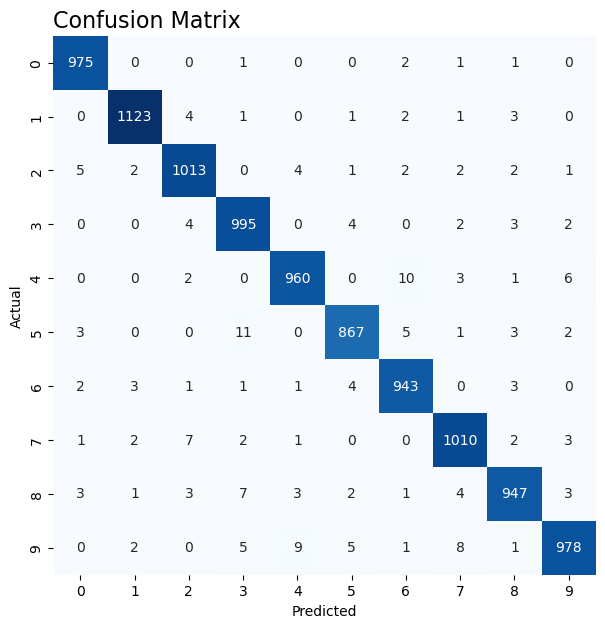

In [57]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

## Model Implementation

In [58]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


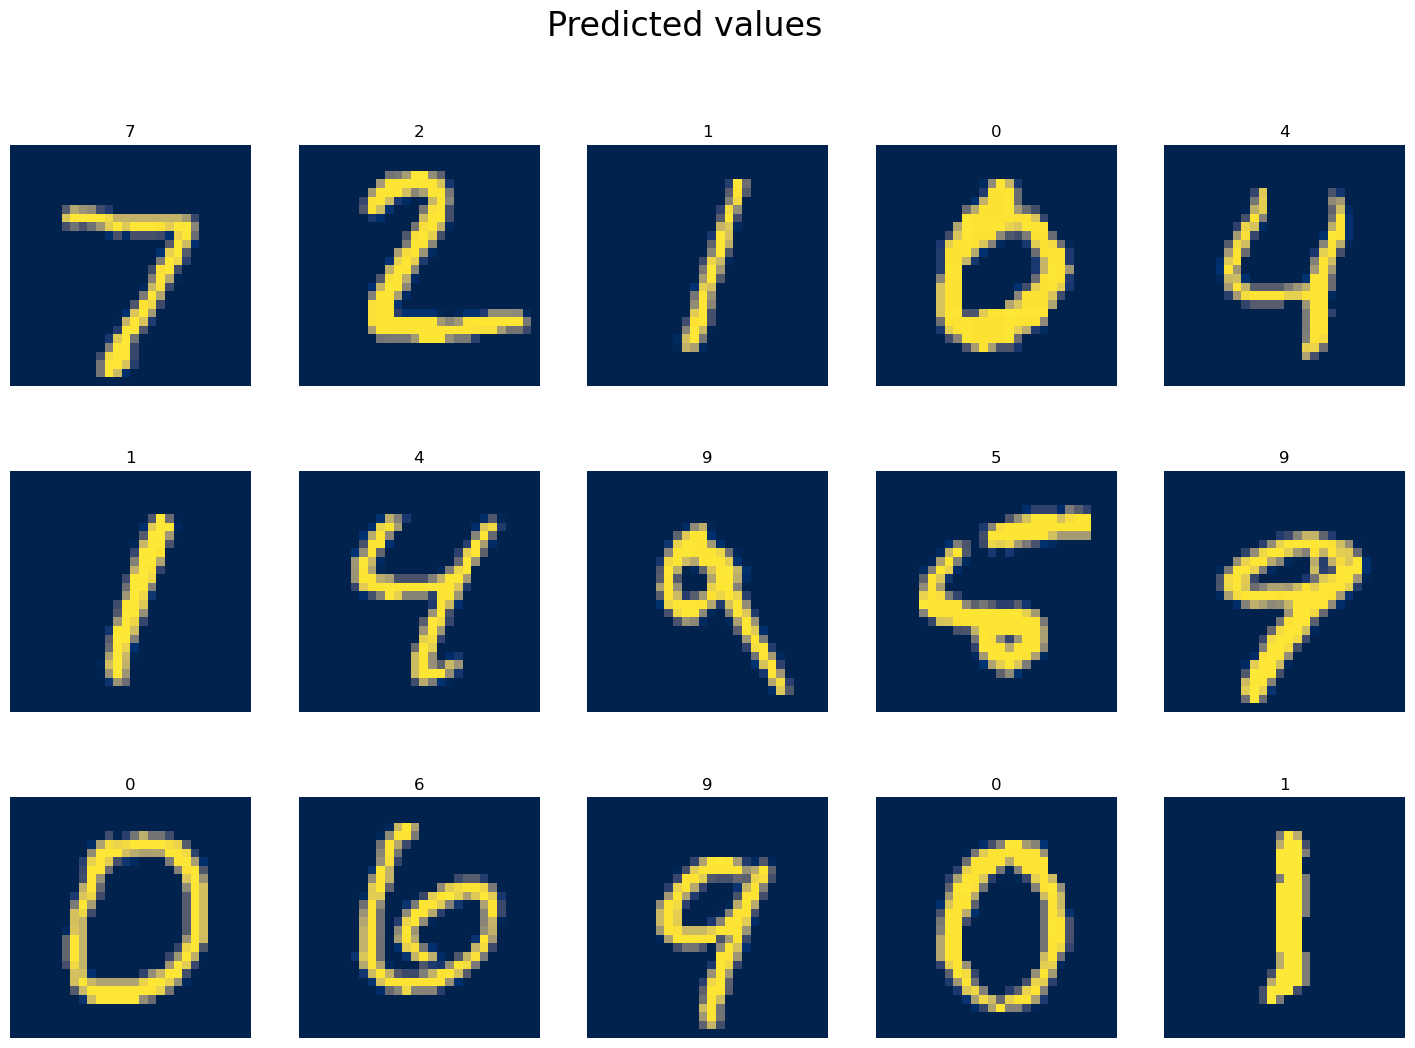

In [59]:
# Model Implementation: Plot images with predicted labels
fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(x_test[:15]):  # Plotting first 15 images
    plt.subplot(3, 5, ind + 1)
    plt.title(y_pred_classes[ind])
    img = row.reshape(28, 28)  # Reshape the image back to 28x28 pixels
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')
plt.show()

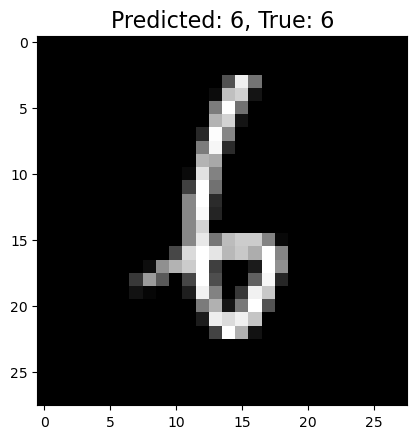

In [60]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_sample_true = y_test[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')
plt.show()


## Model Comparison 

In this project, we evaluated multiple machine learning models to classify handwritten digits from the MNIST dataset. The models tested included Convolutional Neural Networks (CNN), Random Forest, K-Nearest Neighbors (KNN), Bagging Classifier, Stochastic Gradient Descent (SGD) Classifier, and Decision Trees.

In [61]:
# Check lengths of each list
for key in model_metrics:
    print(f"Length of {key}: {len(model_metrics[key])}")

Length of model: 6
Length of f1_score: 6
Length of accuracy: 6
Length of precision: 6
Length of recall: 6
Length of confusion matrix: 6


In [62]:
model_metrics_df=pd.DataFrame(model_metrics)
model_metrics_df.set_index('model',inplace=True)
model_metrics_df.sort_values(by='accuracy',ascending=False)

,f1_score,accuracy,precision,recall,confusion matrix
model,,,,,
CNN,98.0,98.0,98.0,98.0,"[[975, 0, 0, 1, 0, 0, 2, 1, 1, 0], [0, 1123, 4..."
Random Forest,97.0,97.0,97.0,97.0,"[[971, 0, 0, 0, 0, 2, 3, 1, 3, 0], [0, 1127, 2..."
KNeighbors,97.0,97.0,97.0,97.0,"[[974, 1, 1, 0, 0, 1, 2, 1, 0, 0], [0, 1133, 2..."
Bagging Classifier,92.0,92.0,92.0,92.0,"[[959, 0, 2, 2, 0, 6, 5, 4, 1, 1], [0, 1109, 3..."
SGD Classifier,92.0,92.0,92.0,92.0,"[[956, 0, 2, 2, 0, 3, 12, 3, 1, 1], [0, 1117, ..."
Decision Tree,88.0,88.0,88.0,88.0,"[[914, 1, 7, 4, 6, 9, 16, 5, 8, 10], [0, 1084,..."


- CNN achieved the highest performance with an accuracy and F1 score of 98%, making it the most effective model for this classification task.
- Random Forest and KNN also performed very well, each achieving 97% accuracy and F1 scores.
- Bagging Classifier and SGD Classifier showed moderate performance with 92% accuracy and F1 scores.
- Decision Tree had the lowest performance with 88% accuracy and F1 scores.

# Conclusion

- CNN is recommended for deployment due to its superior performance.
- Random Forest and KNN are viable alternatives if computational resources are a constraint, as they offer high accuracy with potentially lower computational cost compared to CNNs.

In [63]:
%store model_metrics

Stored 'model_metrics' (dict)
